# <a id="#">Task 3 – Mean, median, and Gaussian filtering</a>

In [13]:
import numpy
import matplotlib.pyplot as plt

---

## Linear filtering by convolution (mean filter)

**<a id="#">Task 3.1.1.</a>** Load the image `data/lena.png` and show it:

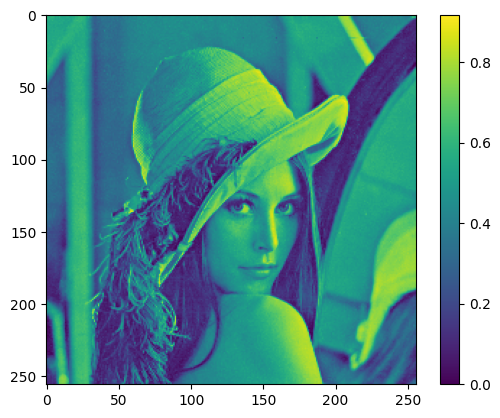

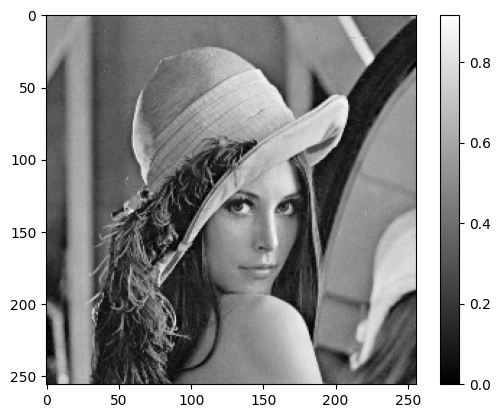

In [14]:
lena = plt.imread('data/lena.png')
plt.figure()
plt.imshow(lena)
plt.colorbar()

#plt.show()
plt.figure()
plt.imshow(lena, 'grey')
plt.colorbar()

**<a id="#">Task 3.1.2.</a>** Implement a mean filter:

In [15]:
def meanfilter(img, size):
    result = numpy.zeros(img.shape)
    n = (size - 1) // 2
    for p in numpy.ndindex(img.shape):
        neighborhood_sum = 0
        for q in numpy.ndindex(size, size):
            if p[0]<(n) or p[1]<(n) or p[0]>=(img.shape[0]-n) or p[1]>=(img.shape[1]-n) :
                pass
                #result[p]= 0
            else:
                neighborhood_sum += img[p[0] + q[0] - n, p[1] + q[1] - n]

        result[p] = (neighborhood_sum / (size ** 2))
    # write your code here
    return result

**<a id="#">Task 3.1.3.</a>** Test your implementation from above by using the function `meanfilter` for the previously loaded image and show the result:

In [16]:
lena3 = meanfilter(lena, 3)

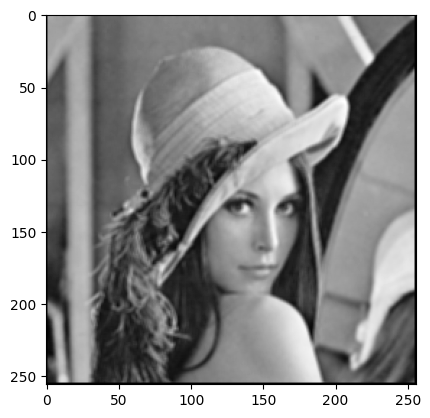

In [17]:
plt.imshow(lena3, 'grey')

**<a id="#">Task 3.1.4.</a>** Compare your result for filter size `5` with the correct result image `data/lena_meanfilter5.png`:

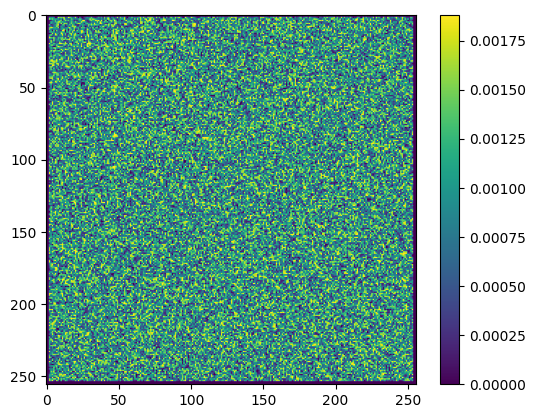

In [18]:
lena5 = meanfilter(lena, 5)
correctlena5 = plt.imread('data/lena_meanfilter5.png')
diff = numpy.abs (lena5-correctlena5)
plt.imshow(diff)
plt.colorbar()
assert numpy.allclose(lena5, correctlena5, atol=1/255)

---

## Non-linear filtering

**<a id="#">Task 3.2.1.</a>** Implement a median filter:

In [19]:
#def medianfilter(img, size):
#    result = numpy.zeros(img.shape)
#    n = (size - 1) // 2
#    for p in numpy.ndindex(img.shape):
#        intensities = list()
#        for q in numpy.ndindex(size, size):
#            if p[0]<(n) or p[1]<(n) or p[0]>=(img.shape[0]-n) or p[1]>=(img.shape[1]-n) :
#                result[p] = 0
#            else:
#                intensities.append(img[p[0] + q[0] - n, p[1] + q[1] - n])
#                intensities.sort()
#                result[p] = intensities[(size ** 2) //2]
#    return result

def medianfilter(img, size):
    result = numpy.zeros(img.shape)
    n = (size - 1) // 2
    for p in numpy.ndindex(img.shape):
        intensities = list()
        if p[0]<(n) or p[1]<(n) or p[0]>=(img.shape[0]-n) or p[1]>=(img.shape[1]-n) :
            result[p] = 0
        else:
            for q in numpy.ndindex(size, size):
                intensities.append(img[p[0] + q[0] - n, p[1] + q[1] - n])
            intensities.sort()
            result[p] = intensities[(size ** 2) //2]
    
    return result

**<a id="#">Task 3.2.2.</a>** First, test your implementation from above by using the function `medianfilter` for the previously loaded image and show the result:

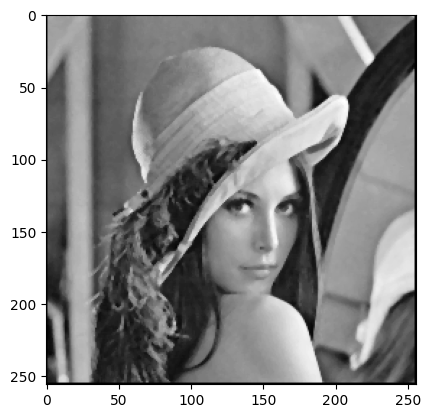

In [20]:
lena3med = medianfilter(lena, 3)
plt.imshow(lena3med, 'grey')

Then, compare your result for filter size `5` with the correct result image `data/lena_medianfilter5.png`:

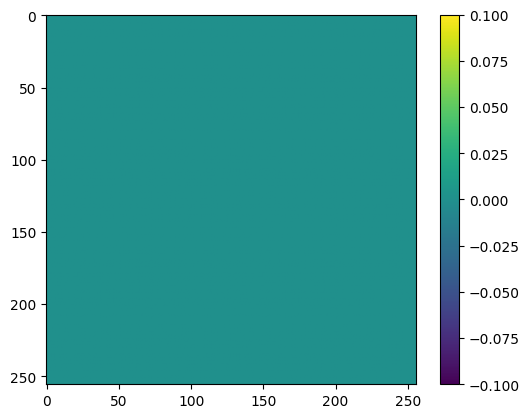

In [21]:
lena5med = medianfilter(lena, 5)
correctlena5med = plt.imread('data/lena_medianfilter5.png')
diff = numpy.abs (lena5med-correctlena5med)
plt.imshow(diff)
plt.colorbar()
assert numpy.allclose(lena5, correctlena5, atol=1/255)

---

## Using pre-implemented filters

**<a id="#">Task 3.3.1.</a>** Load the package `scipy.ndimage`:

In [22]:
import scipy.ndimage

**<a id="#">Task 3.3.2 (a).</a>** Apply a **mean filter** from `scipy.ndimage` to the loaded image:

AssertionError: 

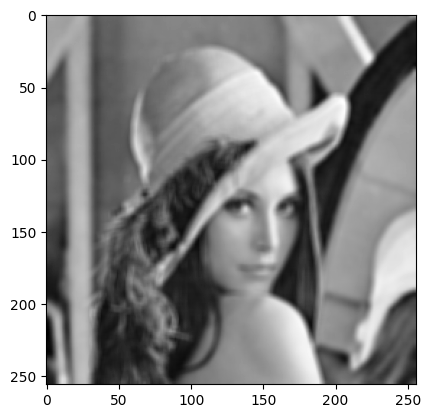

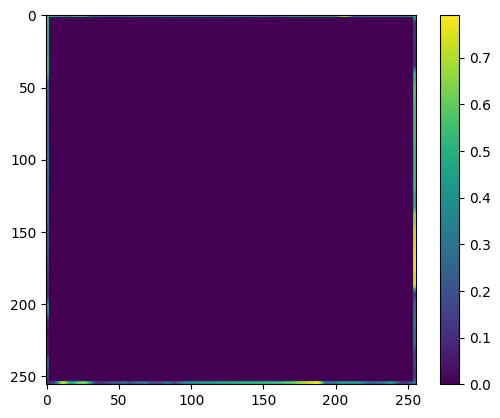

In [23]:
quick5 = scipy.ndimage.uniform_filter(lena, 5)
plt.imshow(quick5, 'grey')
diff = numpy.abs (lena5-quick5)
plt.figure()
plt.imshow(diff)
plt.colorbar()
assert numpy.allclose(lena5, quick5, atol=1/255)

**<a id="#">Task 3.3.2 (b).</a>** Apply a **median filter** from `scipy.ndimage` to the loaded image:

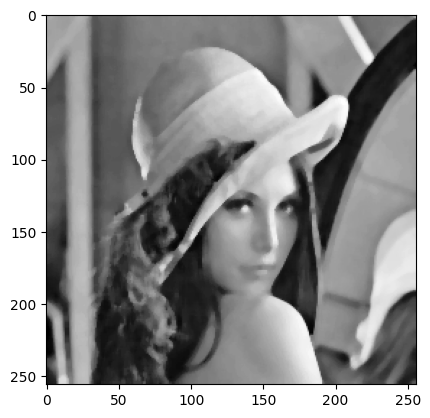

In [24]:
plt.imshow(scipy.ndimage.median_filter(lena, 5), 'grey')

**<a id="#">Task 3.3.2 (c).</a>** Apply a **Gaussian filter** from `scipy.ndimage` to the loaded image:

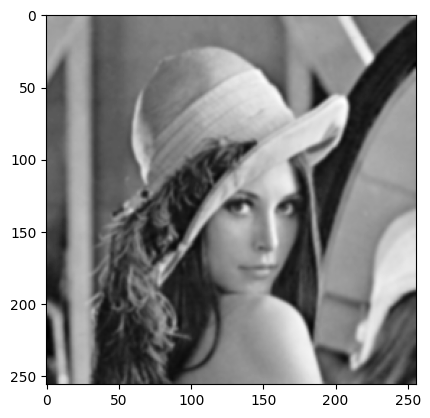

In [25]:
plt.imshow(scipy.ndimage.gaussian_filter(lena, 1), 'grey')

**<a id="#">Task 3.3.3.</a>** Compare the results obtained using the functions from `scipy.ndimage` with those you obtained using your own implementations. What are the main differences? Do you have an explanation?

**Answer:** The main difference is the results from the scipy.ndimage functions don't have a black frame. Probably the module's functions estimate the intesity valuse through taking only the existing neighborhood pixels and calculating the mean or median with these less values as compared to pixels and neighborhood values in the middle of the picture. <br>
Also, it takes way more time for the program to calculate the new picture with the self-written functions. The self-written code iterates over every pixel multiple times, as it has to be asessed for its own value, but also for the values of the neighboring pixels. This can probably be optimized and was done for the functions of the module.

---

## Slicing and benchmarking

**<a id="#">Task 3.4.2.</a>** Implement either a mean filter or a median filter using only a single `for`-loop:

In [26]:
def fastfilter(img, size):
    result = numpy.zeros(img.shape)
    n = (size - 1) // 2
    for p in numpy.ndindex(img.shape):
        if p[0]<(n) or p[1]<(n) or p[0]>=(img.shape[0]-n) or p[1]>=(img.shape[1]-n) :
            result[p] = 0
        else:
            intensities = list()
            intensities = img[p[0]-n:p[0]+n+1,p[1]-n:p[1]+n+1].flatten()
            intensities.sort()
            result[p] = intensities[(size ** 2) //2]
    return result


**<a id="#">Task 3.4.3.</a>** First, test your implementation from above by using the function `fastfilter` for the previously loaded image and show the result:

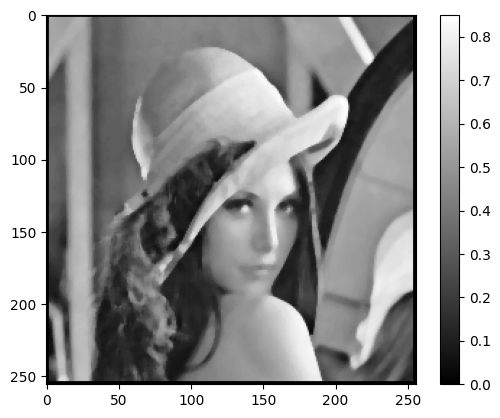

In [27]:
fastlena5med = fastfilter(lena, 5)
plt.figure()
plt.imshow(fastlena5med, 'grey')
plt.colorbar()

Then, compare your result to those obtained using your implementation for either `meanfilter` or `medianfilter`, respectively:

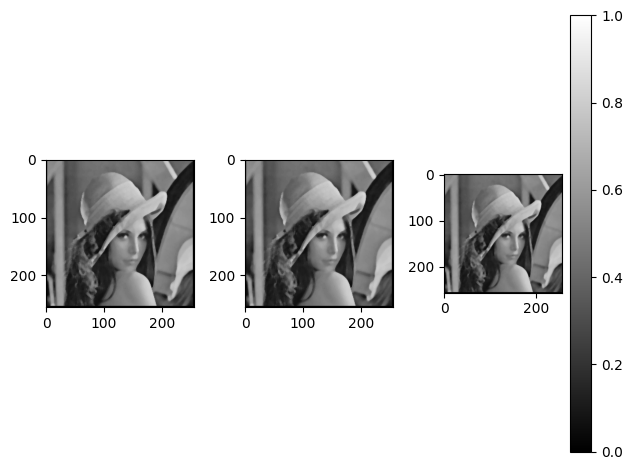

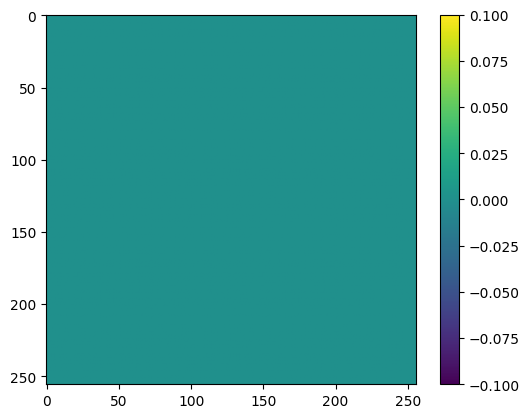

In [28]:
plt.subplot(1, 3, 1)
plt.imshow(lena5med, 'gray', vmin=0, vmax=1)
#plt.colorbar()

plt.subplot(1, 3, 2)
plt.imshow(fastlena5med, 'gray', vmin=0, vmax=1)
#plt.colorbar()
plt.subplot(1, 3, 3)
plt.imshow(correctlena5med, 'gray', vmin=0, vmax=1)

plt.colorbar()
plt.tight_layout()

diff = numpy.abs (fastlena5med-lena5med)
plt.figure()
plt.imshow(diff)
plt.colorbar()
assert numpy.allclose(fastlena5med, lena5med, atol=1/255)

**<a id="#">Task 3.4.4.</a>** Benchmark the code run times:

In [29]:
%timeit fastfilter(lena, 9)
%timeit medianfilter (lena, 9)

321 ms ± 62.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
3.3 s ± 170 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


**<a id="#">Task 3.4.5.</a>** Document your observations regarding the benchmarking results and try to think of an explanation:

for loop dauert deutlich länger als slicing zum array, deswegen ist der fastfilter schneller als der medianfilter